# **Tesla Stock Prediction**

The purpose of this project is to be able to predict the Tesla stock price and predict if the stock price will rise during the day. The model I will be using is Multiple Linear Regression to complete the task of close price prediction and Logistic regression to determine if the stock price will be higher at close than it was at open. The goal of this project is to be able to predict the daily close price of TSLA stock and whether the stock will rise or fall between open of the stock market and close. This is interesting because being able to predict a stock's price at close and whether it will go up or down from day open to close is important information for those who trade stocks.
https://github.com/michaelbutler2020/final_ml_project

The data is from Kaggle https://www.kaggle.com/datasets/timoboz/tesla-stock-data-from-2010-to-2020 (Bozsolik, 2020). There are 2,416 rows of data which include Date, Open price, Daily low, Daily high, Close price, Adjusted close price, and volume. The open price, daily low, daily high, and volume to predict the close price. The types of data are object, Float64, and Int64. The date is the object, which will not be used in the prediction. The adjusted close price column and close price are the same data, so that column is not needed.


    Bozsolik, Timo. “Tesla Stock Data from 2010 to 2020.”
    Kaggle, 4 Feb. 2020, www.kaggle.com/datasets/timoboz/tesla-stock-data-from-2010-to-2020.

A brief overview of each column in the dataset:
Date is the date the stock market data is from.
Open is the price of the stock at the day's open on the stock market.
Close is the price of the stock at the day's close on the stock market.
Low is the day's lowest price.
High is the day's highest price.
Volume is the trading volume for that day.

TODO List
1. Explain Data, Project DONE
2. EDA DONE
3. Model DONE
4. Figure out getting to github
5. Presentation
6. Conclusion DONE

In [138]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


All of the libraries that are used in this project are imported here.

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Pandas library is used to import the csv file.

In [140]:
data = pd.read_csv('/content/gdrive/MyDrive/TSLA.csv')

Next I adjusted some parameters so I could view the dataset better.

In [141]:
pd.options.display.width = 0
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',500)

Here I used methods in pandas for dataframes to display the dimensions of the dataset which is 2416 rows by 7 columns. Then I took a look at the column names and the first 10 rows to get an overview of the data.

In [142]:
print("Total Numbers of Rows in data set: ",data.shape[0])
print("Total Numbers of columns in data set: ",data.shape[1])
col_names = data.columns
print(col_names)
print(data.head(10))

Total Numbers of Rows in data set:  2416
Total Numbers of columns in data set:  7
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
         Date       Open       High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.000000  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.420000  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.920000  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.100000  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.000000  15.830000  16.110001  16.110001   6866900
5  2010-07-07  16.400000  16.629999  14.980000  15.800000  15.800000   6921700
6  2010-07-08  16.139999  17.520000  15.570000  17.459999  17.459999   7711400
7  2010-07-09  17.580000  17.900000  16.549999  17.400000  17.400000   4050600
8  2010-07-12  17.950001  18.070000  17.000000  17.049999  17.049999   2202500
9  2010-07-13  17.389999  18.639999  16.9

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


The data below looks overly correlated, which is not great for fitting a model, but this makes sense for the data as what happens each day is based on the day before. In this scenario this model will be predicting the close price. As stated in the opening paragraph of this project, Adj Close and Close have a correlation of 1 so it is the exact same data. I will remove that column from the dataset. I also am removing the Date column as will not be used in the predictions.

In [144]:
corr_matrix = data.corr(numeric_only = True)
print(corr_matrix)
data = data.drop(columns = ['Date', 'Adj Close'])


               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999425  0.999575  0.998886   0.998886  0.501762
High       0.999425  1.000000  0.999389  0.999640   0.999640  0.512944
Low        0.999575  0.999389  1.000000  0.999447   0.999447  0.493496
Close      0.998886  0.999640  0.999447  1.000000   1.000000  0.505169
Adj Close  0.998886  0.999640  0.999447  1.000000   1.000000  0.505169
Volume     0.501762  0.512944  0.493496  0.505169   0.505169  1.000000


Next I looked at the histograms of each of the columns that I am using for the prediction. All of the histograms except the volume histogram are similar in shape. This is due to the price of the stock each day will be similar between Open, High, Low, and Close.  

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Volume'}>, <Axes: >]], dtype=object)

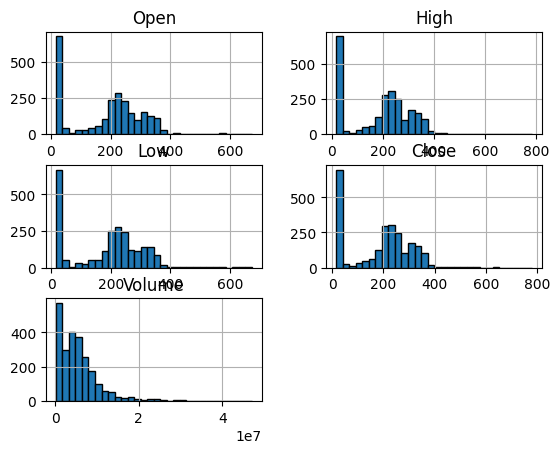

In [145]:
data.hist(bins = 30, edgecolor = 'black')

First the data will be split into x and y, with the response being y, close values, and x the predictors being the rest.

In [146]:
X = data.drop(columns=['Close'])
y = data['Close']

Then, these will be split into train and test sets using the sklearn train_test_split library.

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, random_state=100)

Sklearn library Linear Regression is used to fit the model using the train and test data.

In [148]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

The score method here is used. The X_test dataset is used to predict and is scored against the actuals which is y_test. The coefficients for the data are also included here. It is significant that the last value is much smaller than the others, but this is for Volume which is a much larger number than the rest. Each of the other values in Open, High, Low, and Close are relevant.

In [149]:
print("The score of the model when predicting using the test data is: ", model.score(X_test, y_test))
print(model.coef_)

The score of the model when predicting using the test data is:  0.9996981904309867
[-6.76151289e-01  9.01275227e-01  7.74224517e-01 -2.26327573e-08]


Another way I would like to evaluate this is by looking at on average, how far off the prediction away from the actual. This will be done by computing the Residual Sum of Squares. This is found by computing the sum of the difference between predicted value and the actual value squared. This metric is another way of showing how accurate the model is at predicting. In a prediction using 363 values and predicting the price, an RSS value of 1542.49 is a little high, but that is to be expected as there is high variance in what happens with stocks.

In [150]:
RSS = 0
preds1 = model.predict(X_test)
for i in range(len(y_test)):
  #print(list(y_test)[i])
  RSS += (preds1[i] - list(y_test)[i])**2
print("The Residual Sum of Squares is: ", RSS)


The Residual Sum of Squares is:  1542.4963892058004


The linear model is very accurate, so now to continue the research of predicting this data, I will use logistic regression to predict whether the stock will rise or fall based on the high, low, and Open of the stock each day. I did not include Close as the point of this is to predict if it is higher or lower. In the cell below, a new column is added which is called "Rise". This designates the stock rises in value from day open to close.

In [151]:
UP = [0] *len(data['Close'])
for i in range(len(data['Close'])):
  if data['Close'][i]-data['Open'][i] > 0:
    UP[i] = 1
data['Rise'] = UP

The data is split into X and Y as well as training and test data.

In [152]:
X_log = data[['Low', 'High', 'Open', 'Volume']]
y_log = data['Rise']
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y_log, test_size= .15, random_state= 100)

The Logistic Regression model is created and fit to the training data. Then the model is used to predict our y value using the test data.

In [153]:
model = LogisticRegression().fit(X_log_train, y_log_train)
predictions = model.predict(X_log_test)

The code below compares the predictions to the actuals of the test data to compute accuracy.

In [154]:
ans = 0
for i in range(len(y_log_test)):
  if list(y_log_test)[i] == predictions[i]:
    ans+=1
print("The accuracy of this model is: ", round(ans/len(y_log_test), 2))

The accuracy of this model is:  0.5


This model is not very accurate. After looking at the predictions, every single outcome is the same as not an increase. This is likely due to one predictor and means this model is not usable. I will remove one predictor and cycle through each one to find which is causing this.

In [155]:
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


The predictor that was causing issues was Volume of transactions. The score jumped up by .35 so it is obvious this was the reason that the score was low and the model was predicting every input as not an increase.

In [156]:
Column_to_remove = 0
best_accuracy = 0
for x in X_log_train.columns:
  X_temp_train = X_log_train.drop(columns=[x])
  X_temp_test = X_log_test.drop(columns=[x])
  model = LogisticRegression().fit(X_temp_train, y_log_train)
  score = model.score(X_temp_test, y_log_test)
  print(score)
  if score > best_accuracy:
    best_accuracy = score
    Column_to_remove = x
print("The best accuracy is: ", best_accuracy)
print("The predictor to remove is: ", Column_to_remove)

0.4986225895316804
0.4986225895316804
0.4986225895316804
0.8457300275482094
The best accuracy is:  0.8457300275482094
The predictor to remove is:  Volume


When removing the predictor Volume, we will keep the same split and continue trying to improve the accuracy. This will be done by trying two different penalties while using the solver 'lbfgs'.

In [157]:
X_log_train = X_log_train.drop(columns=['Volume'])
X_log_test = X_log_test.drop(columns=['Volume'])
best_accuracy = 0
best_penalty = 0
accuracies = []

for j in ['l2', 'none']:
  model = LogisticRegression(penalty = j).fit(X_log_train, y_log_train)
  score = model.score(X_log_test, y_log_test)
  print(score)
  if score > best_accuracy:
    best_accuracy = score
    best_penalty = j
    best_mod = model


0.8457300275482094
0.8484848484848485


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [158]:
print("The better penalty to have a higher accuracy is ", best_penalty, "and the accuracy to accompany that is ", best_accuracy)

The better penalty to have a higher accuracy is  none and the accuracy to accompany that is  0.8484848484848485


## Conclusion


The purpose of this project was to train a linear regression model to predict the close price and a logistic regression to predict whether the stock would be higher at the close of the day than the open.
The first model that was created was to predict the price at close. This was done using linear regression and 15% of the data used to test. The method score() was used to score the data using the X and y test data and had a very high score of 0.999. This seemed really high so I decided to look at the Residual Sum of Squares. This value came out to 1,542.49. This value is a little high considering the data set is only 363 values, but in all it is reasonable because stocks in principle are inconsistent an unpredictable.
The next models were logistic regression using 15% of the data to test. The first model was using the predictors Low, High, Open, and Volume and these had a very low accuracy of 0.5. Taking a look at this further, the model predicted all of the test data as not increasing in value. I took this as one of my predictors was altering the model. Through iteration, when volume was removed, the accuracy improved to 0.846. This is a significant increase  and to further improve accuracy, the two penalties that are able to be used with solver ‘lbfgs’ are ‘l1’ and ‘none’.  This increased the accuracy to 0.849, which is significant enough to think it would do better.
In all, these models when given more recent data are well trained enough to predict which days will be good to buy and sell and what the close will be. A few graphs representing the accuracy of the data can be seen below.

Below is a residual plot that shows the residuals of each predicted value compared to the actual based on the Open price. It can be seen that there might be some homoscedasticity violations. The variance in residuals is very small when the Open value is closer to 0 and variance very large when Open price is between 200 and 400.

<Axes: xlabel='Open'>

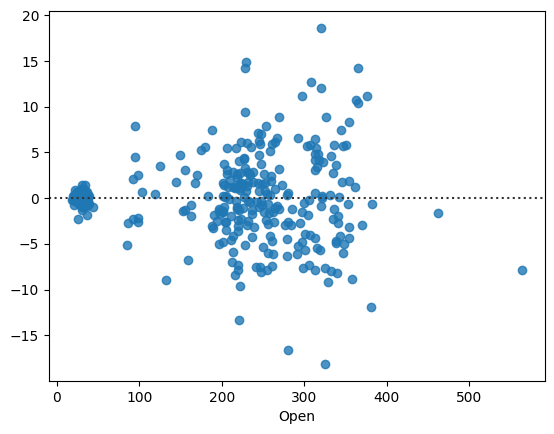

In [161]:
residuals = []
preds1 = list(preds1)
for i in range(len(preds1)):
  residuals.append(list(y_log_test)[i]-preds1[i])
sn.residplot(x = X_log_test['Open'], y = residuals)


Below is a confusion matrix comparing the predicted vs actuals of the logistic regression predicting if the stock would go up. The majority are correct in the yellow color and there are approximately equal numbers of each misassigned prediction.

[0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 

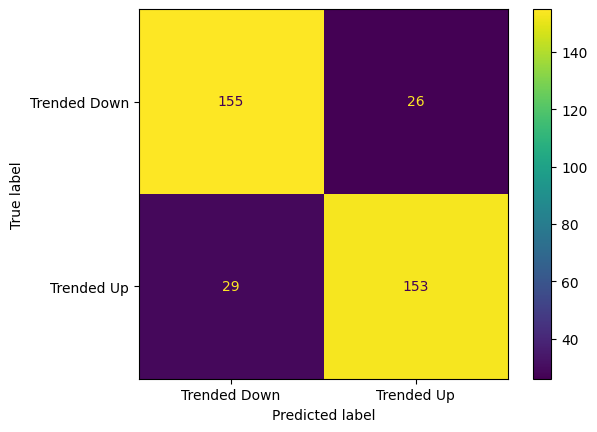

In [159]:
preds = model.predict(X_log_test)
print(list(preds))
cm = confusion_matrix(list(y_log_test), list(preds), labels = [0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Trended Down', 'Trended Up'])
disp.plot()

There are some ways that this project could be built upon or improved in the future. This can include bringing in more recent data and using that as the test set with the original data used for testing, using the previous day's high and low as well as the close price to predict if the stock will go up or down in value during the next day.   
 One thing that was interesting is that the Volume predictor severely interfered with predicting whether the stock price would go up or down. In future experimentation, I would like to figure out why this causes the tests to all pass or all fail and if it is a predictor that can be used or if it is just not able to help predict the data. I think that this does not work because there is no specification of buying versus selling and more how much the stock was transacted on. If this was two different columns with amount sold and amount purchased, it would be a key predictor in this model.    
 The big take away of something that I learned is that predictors will not always work how you expect them to. In this data, I thought that the volume column would be a very important predictor for the model. This was the contrary as in the linear model, the coefficient was very small and the logistic model it completely interfered with predictions.